In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data
data=pd.read_csv('/content/drive/MyDrive/sales_data.csv')
data

,Top Level Branch,Top Level Sold To,Zone,Region Zone,Top Level Order,Top Level Line,Last Next Status,Shipment Number(s),TL SO Alert,ECD,ECD Notes,Line Creation,Top Level Type,Schedule Pick Date,Promised Delivery Date,Top Level Item,Supply Item Description,SRP1,SC Rep,Line Amount
0,Branch 1,Customer_5725,West,Zone B,ORD979385,LINE942260,Delivered,SHP607593,NaN,7/7/21,on track,6/26/21,Type 3,6/28/21,7/9/21,Product_2047,Description of item,314.10,Rep A,6284.57
1,Branch 2,Customer_1478,East,Zone D,ORD511328,LINE751062,On Hold,SHP217964,NaN,1/25/25,demand surge,12/21/24,Type 1,12/23/24,1/8/25,Product_8591,Description of item,27.40,Rep C,5804.15
2,Branch 4,Customer_6969,South,Zone A,ORD601081,LINE281110,On Hold,SHP716060,NaN,5/5/22,supplier price changes,3/23/22,Type 2,3/25/22,4/21/22,Product_10104,Description of item,371.18,Rep D,7932.74
3,Branch 2,Customer_2571,North,Zone C,ORD235895,LINE853706,Delivered,SHP871471,NaN,1/26/22,customs backlog,12/29/21,Type 3,12/31/21,1/7/22,Product_2451,Description of item,487.23,Rep C,6346.75
4,Branch 4,Customer_9149,North,Zone D,ORD162338,LINE458078,Shipped,SHP642460,NaN,11/20/24,on track,10/24/24,Type 2,10/26/24,11/21/24,Product_4722,Description of item,462.05,Rep C,6749.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Branch 4,Customer_7766,East,Zone B,ORD555145,LINE305370,Shipped,SHP918734,URGENT,12/28/20,on track,12/5/20,Type 1,12/7/20,12/29/20,Product_2365,Description of item,90.11,Rep C,5663.86
14996,Branch 1,Customer_1398,South,Zone B,ORD157503,LINE325449,On Hold,SHP986221,NaN,10/30/22,on track,10/11/22,Type 3,10/13/22,11/1/22,Product_545,Description of item,89.56,Rep C,5203.28
14997,Branch 4,Customer_1123,South,Zone A,ORD162903,LINE513890,Delivered,SHP653410,NaN,2/8/23,on track,1/15/23,Type 3,1/17/23,2/8/23,Product_7477,Description of item,42.59,Rep A,4610.91
14998,Branch 3,Customer_3372,North,Zone C,ORD516019,LINE467771,Delivered,SHP629046,NaN,1/4/25,on track,12/21/24,Type 1,12/23/24,1/5/25,Product_9032,Description of item,264.47,Rep B,619.51


## Understanding the Data

In [ ]:
data.shape

(15000, 20)

*   **Top Level Branch**: Sales branch managing the order ***(Branch1, Branch2, Branch3, Branch4)***

*   **Top Level Sold To**:  Client account (we have 7281 unique values that indicates some of the customers were repeated)

*   **Zone**: Geographic Segment ***(West, East, North, south)***

* **Region Zone**:  Geographic Segment ***(Zone A, Zone B, Zone C, Zone D)***

*   **Top Level Order**: Order identifier (we have around 14877 unique values and some of these are repeated)

*   **Top level Line**: Order Identifier (we have 14899 unique values and the rest are repeating)

* **Last Next Status**: Status of the order ***(Delivered, On Hold, Shipped, Processing)***

* **Shipment Number**: Order Identifier (we have 14878 unique values and some of them are repeated)

* **TL SO Alert**: Alerts or flags (e.g., URGENT)

* **ECD**: Actual Completion Date

* **ECD Notes**: Notes on delay reason or notes

        ('on track', 'demand surge', 'supplier price changes',
       'customs backlog', 'inventory mismatch', 'holiday backlog',
       'QA inspection delays', 'shipping container shortage',
       'COVID-19 disruption', 'other issue', 'factory shutdown',
       'raw material shortage', 'labor shortage',
       'production capacity limits', 'supply chain delay',
       'inflation impact', 'severe weather')

* **Line Creation**: When the order was created (we have 1825 unique values that means most of the dates are repeated

* **Top Level Type**: Product information    

* **Schedule Pick Date**: Planned pickup date

* **Promised Delivery Date **: Promised completion date

* **Top Level Item**: Product Information

* **Supply Item Description**: Product Info (here its the same for all rows)

* **SRP1**: Unit Price

* **SC Rep**: Sales Contact

* **Line Amount**: Total amount in dollars





We have 15000 rows and 20 columns in our dataset

In [ ]:
len(data['Top Level Sold To'].unique())

7281

In [ ]:
data['Zone'].unique()

array(['West', 'East', 'South', 'North'], dtype=object)

In [ ]:
data['Region Zone'].unique()

array(['Zone B', 'Zone D', 'Zone A', 'Zone C'], dtype=object)

In [ ]:
len(data['Top Level Order'].unique())

14877

In [ ]:
len(data['Top Level Line'].unique())

14899

In [ ]:
data['Last Next Status'].unique()

array(['Delivered', 'On Hold', 'Shipped', 'Processing'], dtype=object)

In [ ]:
len(data['Shipment Number(s)'].unique())

14878

In [ ]:
data['TL SO Alert'].unique()

array([nan, 'URGENT'], dtype=object)

In [ ]:
data['ECD Notes'].unique()

array(['on track', 'demand surge', 'supplier price changes',
       'customs backlog', 'inventory mismatch', 'holiday backlog',
       'QA inspection delays', 'shipping container shortage',
       'COVID-19 disruption', 'other issue', 'factory shutdown',
       'raw material shortage', 'labor shortage',
       'production capacity limits', 'supply chain delay',
       'inflation impact', 'severe weather'], dtype=object)

In [ ]:
len(data['Line Creation'].unique())

1825

In [ ]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Top Level Branch         15000 non-null  object 
 1   Top Level Sold To        15000 non-null  object 
 2   Zone                     15000 non-null  object 
 3   Region Zone              15000 non-null  object 
 4   Top Level Order          15000 non-null  object 
 5   Top Level Line           15000 non-null  object 
 6   Last Next Status         15000 non-null  object 
 7   Shipment Number(s)       15000 non-null  object 
 8   TL SO Alert              3760 non-null   object 
 9   ECD                      15000 non-null  object 
 10  ECD Notes                15000 non-null  object 
 11  Line Creation            15000 non-null  object 
 12  Top Level Type           15000 non-null  object 
 13  Schedule Pick Date       15000 non-null  object 
 14  Promised Delivery Date

*   We can observe that all the columns except SRP1, Line Amount are of type Object datatype.

*   Column TL SO Alert has 3760 no null values that indicates these are URGENT and the rest of the rows are null






In [ ]:
# Describing the data (Numerical Columns)
data.describe()

,SRP1,Line Amount
count,15000.000000,15000.000000
mean,257.692876,5256.959431
std,138.863319,2736.457202
min,20.020000,501.460000
25%,137.070000,2877.320000
50%,256.070000,5252.135000
75%,378.372500,7611.252500
max,500.000000,9999.860000


## **Feature Engineering**


### Conversion of Line Creation, ECD, Schedule Pickup, Promised Delivery Date


In [ ]:
# Convert object columns to datetime
date_columns = ['ECD', 'Line Creation', 'Schedule Pick Date', 'Promised Delivery Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')  # coerce invalid formats into NaT

# Verify the changes
data[date_columns].info()


<ipython-input-17-abb9b074d25f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')  # coerce invalid formats into NaT
<ipython-input-17-abb9b074d25f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')  # coerce invalid formats into NaT
<ipython-input-17-abb9b074d25f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')  # coerce invalid formats into NaT
<ipython-input-17-abb9b074d25f>:4: UserWarning: Could not infer for

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ECD                     15000 non-null  datetime64[ns]
 1   Line Creation           15000 non-null  datetime64[ns]
 2   Schedule Pick Date      15000 non-null  datetime64[ns]
 3   Promised Delivery Date  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 468.9 KB


### Creation of new columns from the data we have

| **Feature**   | **What It Means**                    | **Why It's Useful**            |
| ------------- | ------------------------------------ | ------------------------------ |
| `delay_days`  | `ECD - Promised Date`                | Severity of delay              |
| `delay_flag`  | 1 if `delay_days > 0`, else 0        | Classification target          |
| `lead_time`   | `Promised Date - Line Creation`      | Quoted lead time (Q-OLT)       |
| `pickup_lead` | `Schedule Pick Date - Line Creation` | Internal prep time             |
| `month`       | Month from `Promised Date`           | Detect seasonal trends         |
| `year`        | Year from `Promised Date`            | Align with yearly delay causes |
| `week`        | Week number from `Promised Date`     | Catch Q4, holiday patterns     |
| `is_urgent`   | 1 if `TL SO Alert == URGENT`, else 0 | High-risk flag for delay       |
| `total_units`| Line Amount/SRP1| Helps us in finding total of units to be made|

Quoted Order Lead Time (Q-OLT): The time agreed upon between a supplier and customer for delivery.


In [ ]:
# 1. Calculate delay in days
data['delay_days'] = (data['ECD'] - data['Promised Delivery Date']).dt.days

# 2. Create delay_flag (1 if delayed, 0 otherwise)
data['delay_flag'] = (data['delay_days'] > 0).astype(int)

# 3. Create lead_time (Promised - Created) → this is Quoted Lead Time (Q-OLT)
data['lead_time'] = (data['Promised Delivery Date'] - data['Line Creation']).dt.days

# 4. Create pickup_lead (Scheduled Pickup - Created)
data['pickup_lead'] = (data['Schedule Pick Date'] - data['Line Creation']).dt.days

# 5. Extract month from Promised Delivery Date
data['month'] = data['Promised Delivery Date'].dt.month

# 6. Extract year from Promised Delivery Date
data['year'] = data['Promised Delivery Date'].dt.year

# 7. Extract ISO week number from Promised Delivery Date
data['week'] = data['Promised Delivery Date'].dt.isocalendar().week

# 8. Create is_urgent flag (1 if alert is URGENT, 0 otherwise)
data['is_urgent'] = (data['TL SO Alert'].fillna('').str.upper() == 'URGENT').astype(int)

#9 Total Units
data['total_units'] = (data['Line Amount'] / data['SRP1']).replace([np.inf, -np.inf], np.nan)


In [ ]:
data

,Top Level Branch,Top Level Sold To,Zone,Region Zone,Top Level Order,Top Level Line,Last Next Status,Shipment Number(s),TL SO Alert,ECD,...,Line Amount,delay_days,delay_flag,lead_time,pickup_lead,month,year,week,is_urgent,total_units
0,Branch 1,Customer_5725,West,Zone B,ORD979385,LINE942260,Delivered,SHP607593,NaN,2021-07-07,...,6284.57,-2,0,13,2,7,2021,27,0,20.008182
1,Branch 2,Customer_1478,East,Zone D,ORD511328,LINE751062,On Hold,SHP217964,NaN,2025-01-25,...,5804.15,17,1,18,2,1,2025,2,0,211.830292
2,Branch 4,Customer_6969,South,Zone A,ORD601081,LINE281110,On Hold,SHP716060,NaN,2022-05-05,...,7932.74,14,1,29,2,4,2022,16,0,21.371680
3,Branch 2,Customer_2571,North,Zone C,ORD235895,LINE853706,Delivered,SHP871471,NaN,2022-01-26,...,6346.75,19,1,9,2,1,2022,1,0,13.026189
4,Branch 4,Customer_9149,North,Zone D,ORD162338,LINE458078,Shipped,SHP642460,NaN,2024-11-20,...,6749.76,-1,0,28,2,11,2024,47,0,14.608289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Branch 4,Customer_7766,East,Zone B,ORD555145,LINE305370,Shipped,SHP918734,URGENT,2020-12-28,...,5663.86,-1,0,24,2,12,2020,53,1,62.854955
14996,Branch 1,Customer_1398,South,Zone B,ORD157503,LINE325449,On Hold,SHP986221,NaN,2022-10-30,...,5203.28,-2,0,21,2,11,2022,44,0,58.098258
14997,Branch 4,Customer_1123,South,Zone A,ORD162903,LINE513890,Delivered,SHP653410,NaN,2023-02-08,...,4610.91,0,0,24,2,2,2023,6,0,108.262738
14998,Branch 3,Customer_3372,North,Zone C,ORD516019,LINE467771,Delivered,SHP629046,NaN,2025-01-04,...,619.51,-1,0,15,2,1,2025,1,0,2.342459


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Top Level Branch         15000 non-null  object        
 1   Top Level Sold To        15000 non-null  object        
 2   Zone                     15000 non-null  object        
 3   Region Zone              15000 non-null  object        
 4   Top Level Order          15000 non-null  object        
 5   Top Level Line           15000 non-null  object        
 6   Last Next Status         15000 non-null  object        
 7   Shipment Number(s)       15000 non-null  object        
 8   TL SO Alert              3760 non-null   object        
 9   ECD                      15000 non-null  datetime64[ns]
 10  ECD Notes                15000 non-null  object        
 11  Line Creation            15000 non-null  datetime64[ns]
 12  Top Level Type           15000 n

## Exploratory Data Analysis

### Overall Delay Rate

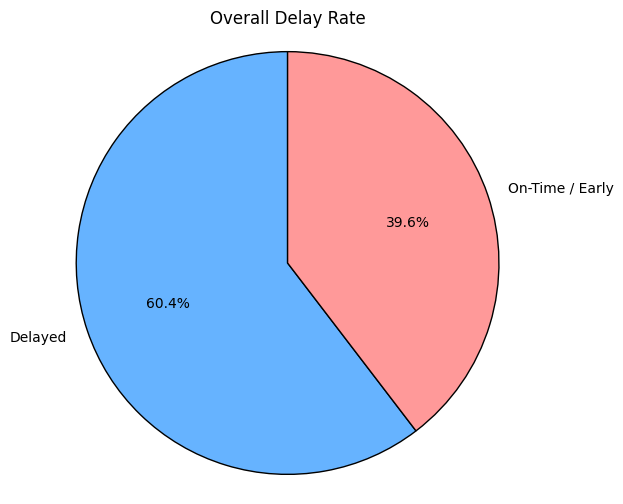

In [ ]:
# Count of delayed vs not delayed
delay_counts = data['delay_flag'].value_counts()

# Labels for the pie chart
labels = [ 'Delayed','On-Time / Early']

# Colors for better visual distinction
colors = ['#66b3ff', '#ff9999']

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(delay_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Overall Delay Rate')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


Out of 15,000 orders over a five-year period, approximately 60.4% were delayed (delivered after the promised date), while 39.6% were delivered on-time or early.

This is same as mentioned in the pdf

In [ ]:
delay_counts

,count
delay_flag,
1,9059
0,5941


In [ ]:
# 4. And view the overall delay rate (% of orders that are late)
delay_rate = data['delay_flag'].mean()  # mean of a boolean series gives fraction of True
print(f"Overall delay rate: {delay_rate:.2%}")

Overall delay rate: 60.39%


### **Delay Rate Region Zone wise**

<ipython-input-32-68c1e29aea8f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_region, x='Region Zone', y='delay_flag', palette='coolwarm')


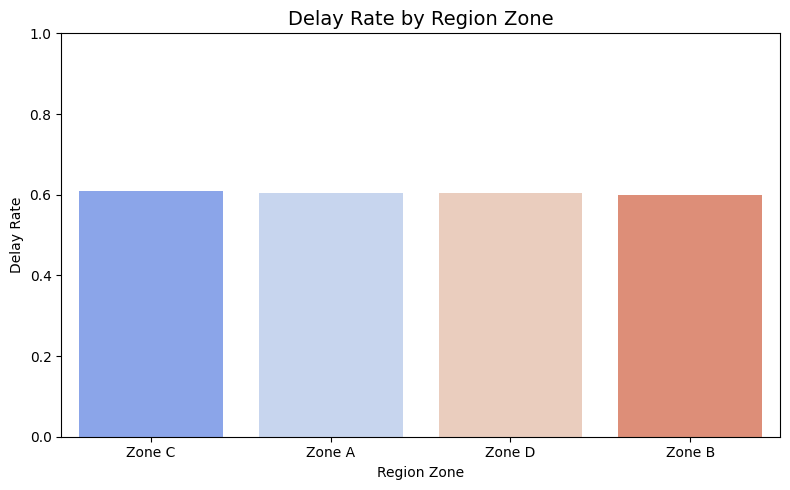

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Region Zone' and calculate delay rate
delay_by_region = data.groupby('Region Zone')['delay_flag'].mean().sort_values(ascending=False)

# Step 2: Reset index to make it plottable
delay_by_region = delay_by_region.reset_index()

# Step 3: Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_region, x='Region Zone', y='delay_flag', palette='coolwarm')

# Step 4: Add labels and title
plt.title('Delay Rate by Region Zone', fontsize=14)
plt.ylabel('Delay Rate')
plt.xlabel('Region Zone')
plt.ylim(0, 1)  # since delay rate is between 0 and 1
plt.tight_layout()
plt.show()


In [ ]:
delay_by_region

,Region Zone,delay_flag
0,Zone C,0.608918
1,Zone A,0.604538
2,Zone D,0.603910
3,Zone B,0.598542


Zone C has the highest delay rate at 60.9%, slightly above average.

In the PDF given, (e.g., Zone B and Zone D) show a higher delay rate but all of these are close and Zone C and Zone A are having higher delay rate


### **Delay rate Zone-wise**

<ipython-input-35-7a874084684e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_zone, x='Zone', y='delay_flag', palette='crest')


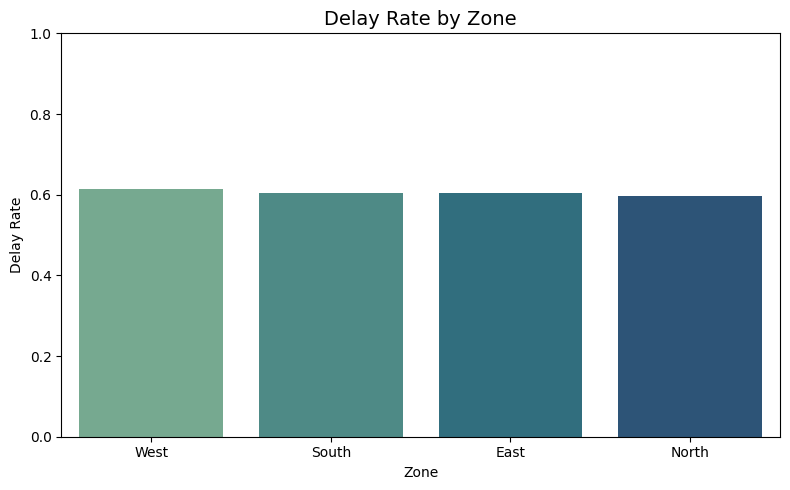

In [ ]:
# Step 1: Group and calculate delay rate
delay_by_zone = data.groupby('Zone')['delay_flag'].mean().sort_values(ascending=False)

# Step 2: Convert Series to DataFrame for plotting
delay_by_zone = delay_by_zone.reset_index()

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_zone, x='Zone', y='delay_flag', palette='crest')

# Step 4: Add labels
plt.title('Delay Rate by Zone', fontsize=14)
plt.xlabel('Zone')
plt.ylabel('Delay Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_zone

,Zone,delay_flag
0,West,0.612912
1,South,0.603601
2,East,0.603504
3,North,0.596203


**Delay Rate by Zone**:

Among the four geographic zones, Zone West has the highest delay rate at 61.3%, followed by South and East, both around 60.4%.
Zone North has the lowest delay rate at 59.6%.


### **Delay by Top Level Branch**

<ipython-input-48-014333053a85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_branch, x='delay_flag', y='Top Level Branch', palette='viridis')


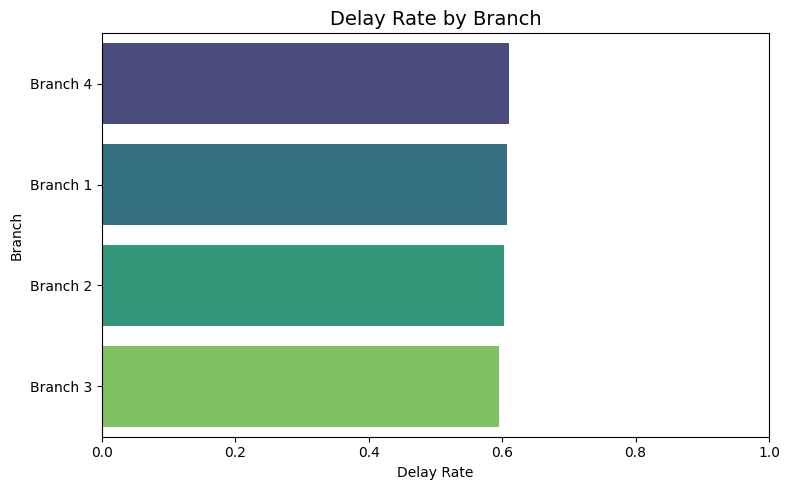

In [ ]:
# Step 1: Group and calculate delay rate by product type
delay_by_branch = data.groupby('Top Level Branch')['delay_flag'].mean().sort_values(ascending=False)

# Step 2: Convert to DataFrame for plotting
delay_by_branch = delay_by_branch.reset_index()

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_branch, x='delay_flag', y='Top Level Branch', palette='viridis')

# Step 4: Add labels
plt.title('Delay Rate by Branch', fontsize=14)
plt.xlabel('Delay Rate')
plt.ylabel('Branch')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_branch

,Top Level Branch,delay_flag
0,Branch 4,0.610582
1,Branch 1,0.607326
2,Branch 2,0.602898
3,Branch 3,0.594974


Delay Rate by Top Level Branch:

The highest delay rate was observed in Branch 4, where approximately 61.1% of orders were delayed. Branches 1 and 2 followed closely behind, both exceeding 60%.
Branch 3 had the lowest delay rate at 59.5%, indicating slightly better performance.

### **Delay by Top Level Type**

<ipython-input-52-eb8402818659>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_product, x='delay_flag', y='Top Level Type', palette='magma')


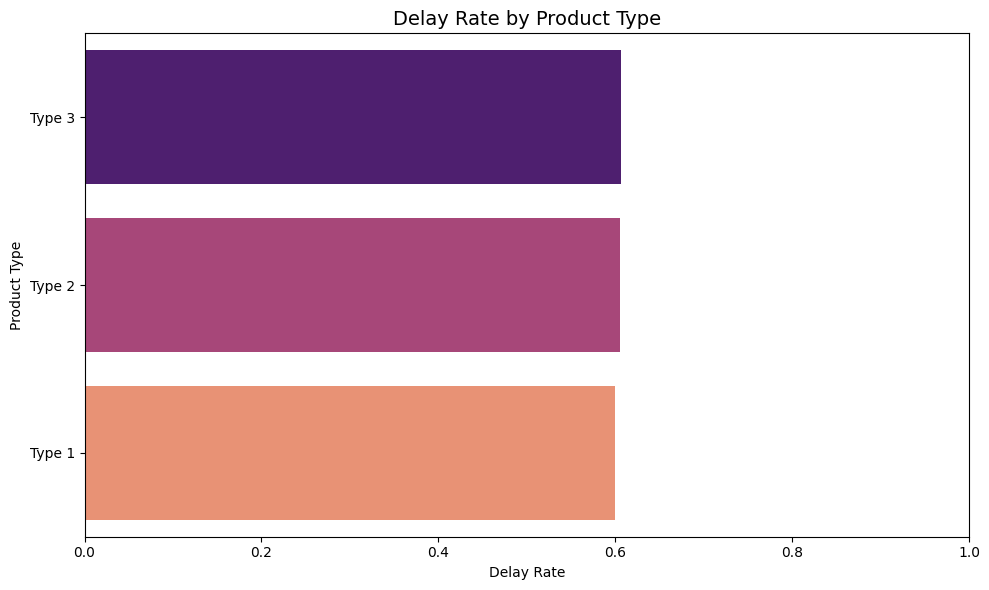

In [ ]:
# Step 1: Group and calculate delay rate by product type
delay_by_product = data.groupby('Top Level Type')['delay_flag'].mean().sort_values(ascending=False)

# Step 2: Convert to DataFrame
delay_by_product = delay_by_product.reset_index()

# Step 3: Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=delay_by_product, x='delay_flag', y='Top Level Type', palette='magma')

# Step 4: Add chart labels
plt.title('Delay Rate by Product Type', fontsize=14)
plt.xlabel('Delay Rate')
plt.ylabel('Product Type')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_product

,Top Level Type,delay_flag
0,Type 3,0.607087
1,Type 2,0.605172
2,Type 1,0.599478


Delay Rate by Product Type:

Among the three major product types, Type 3 had the highest delay rate at 60.7%, followed closely by Type 2 (60.5%).
Type 1 showed a slightly lower delay rate at 59.9%, indicating relatively better fulfillment performance.
While all product types have delay rates around the 60% mark, the consistently higher delays in Type 3 may suggest more complex production, logistics challenges, or higher order volumes.



### **Delay by Urgency**

<ipython-input-56-f58a34501b65>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_urgency, x='Urgency', y='delay_flag', palette=['#66b3ff', '#ff9999'])


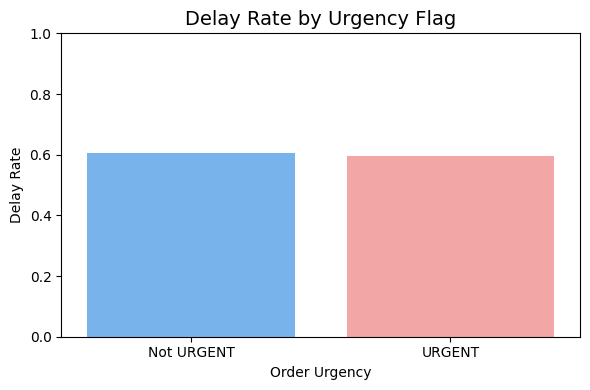

In [ ]:
# Step 1: Group and calculate delay rate by urgency
delay_by_urgency = data.groupby('is_urgent')['delay_flag'].mean().reset_index()

# Step 2: Map labels for clarity
delay_by_urgency['Urgency'] = delay_by_urgency['is_urgent'].map({0: 'Not URGENT', 1: 'URGENT'})

# Step 3: Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=delay_by_urgency, x='Urgency', y='delay_flag', palette=['#66b3ff', '#ff9999'])

# Step 4: Add labels and grid
plt.title('Delay Rate by Urgency Flag', fontsize=14)
plt.xlabel('Order Urgency')
plt.ylabel('Delay Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_urgency

,is_urgent,delay_flag,Urgency
0,0,0.607206,Not URGENT
1,1,0.594149,URGENT


### **Delay by Sales Rep**

<ipython-input-58-69327115cc22>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reps, x='delay_flag', y='SC Rep', palette='flare')


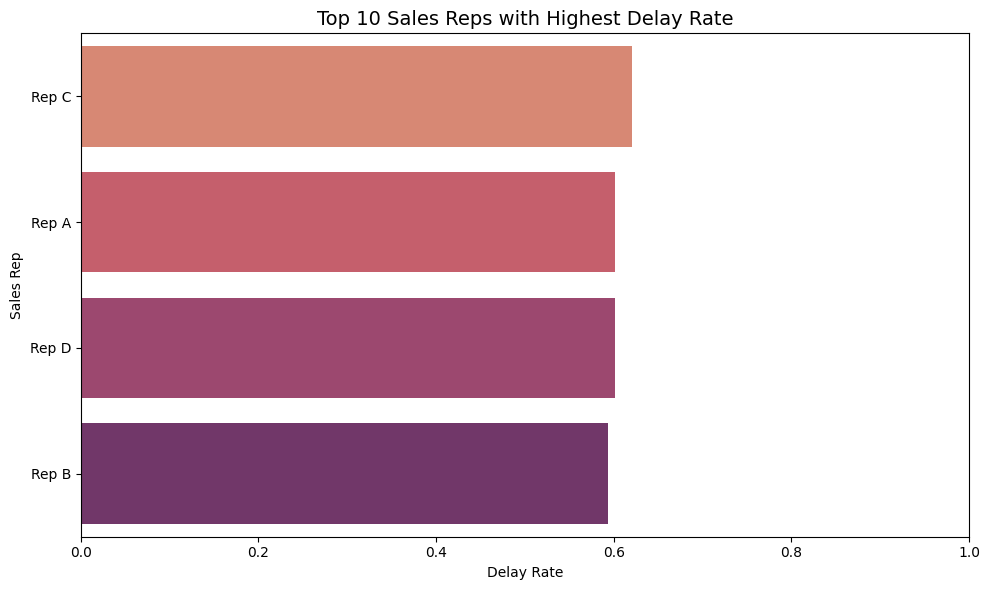

In [ ]:
# Step 1: Group by Sales Rep and calculate delay rate
delay_by_rep = data.groupby('SC Rep')['delay_flag'].mean().sort_values(ascending=False)

# Step 2: Convert to DataFrame
delay_by_rep = delay_by_rep.reset_index()

# Optional Step: Show only top 10 reps with highest delay rate
top_reps = delay_by_rep.head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reps, x='delay_flag', y='SC Rep', palette='flare')

# Step 4: Add labels
plt.title('Top 10 Sales Reps with Highest Delay Rate', fontsize=14)
plt.xlabel('Delay Rate')
plt.ylabel('Sales Rep')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_rep

,SC Rep,delay_flag
0,Rep C,0.620103
1,Rep A,0.601109
2,Rep D,0.601071
3,Rep B,0.593750


Delay Rate by Sales Rep:

Among the four sales representatives, Rep C had the highest delay rate at 62.0%, followed by Rep A and Rep D, both around 60.1%.
Rep B had the lowest delay rate at 59.4%.

<ipython-input-78-0cc7dd49972a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_status, x='delay_flag', y='Last Next Status', palette='Spectral')


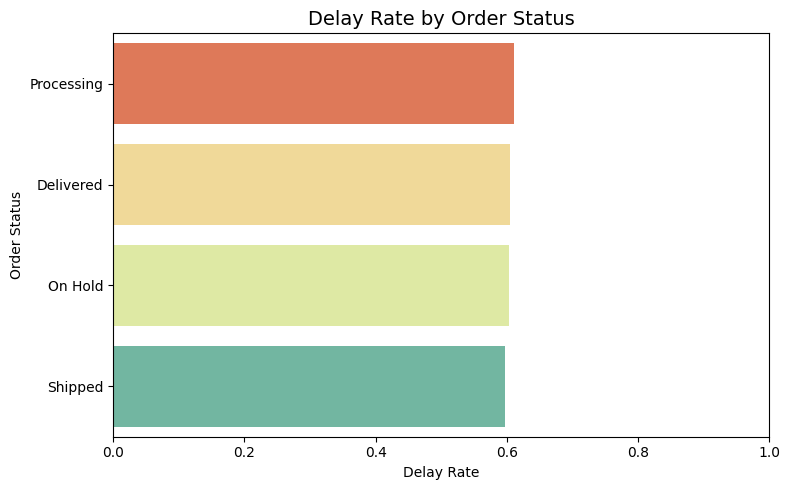

In [ ]:
# Group by Last Next Status and calculate mean delay
delay_by_status = data.groupby('Last Next Status')['delay_flag'].mean().reset_index()

# Sort for cleaner plot
delay_by_status = delay_by_status.sort_values('delay_flag', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_status, x='delay_flag', y='Last Next Status', palette='Spectral')

# Labeling
plt.title('Delay Rate by Order Status', fontsize=14)
plt.xlabel('Delay Rate')
plt.ylabel('Order Status')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_status

,Last Next Status,delay_flag
2,Processing,0.610764
0,Delivered,0.604620
1,On Hold,0.602992
3,Shipped,0.597159


<ipython-input-80-38f8b9d1e509>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ecd_reason_counts.head(10), x='Count', y='Reason', palette='plasma')


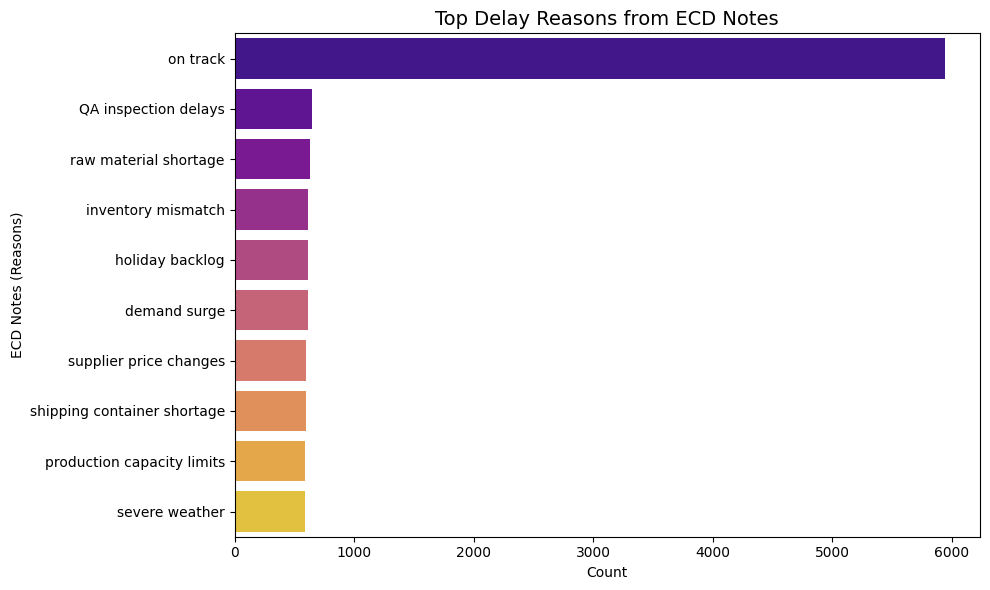

In [ ]:
# Step 1: Frequency count of delay reasons
ecd_reason_counts = data['ECD Notes'].value_counts().reset_index()
ecd_reason_counts.columns = ['Reason', 'Count']

# Step 2: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ecd_reason_counts.head(10), x='Count', y='Reason', palette='plasma')
plt.title('Top Delay Reasons from ECD Notes', fontsize=14)
plt.xlabel('Count')
plt.ylabel('ECD Notes (Reasons)')
plt.tight_layout()
plt.show()


In [ ]:
ecd_reason_counts

,Reason,Count
0,on track,5941
1,QA inspection delays,652
2,raw material shortage,630
3,inventory mismatch,615
4,holiday backlog,612
5,demand surge,612
6,supplier price changes,600
7,shipping container shortage,599
8,production capacity limits,593
9,severe weather,593


<ipython-input-81-7e2cc7f8827e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_reason.head(10), x='delay_flag', y='ECD Notes', palette='coolwarm')


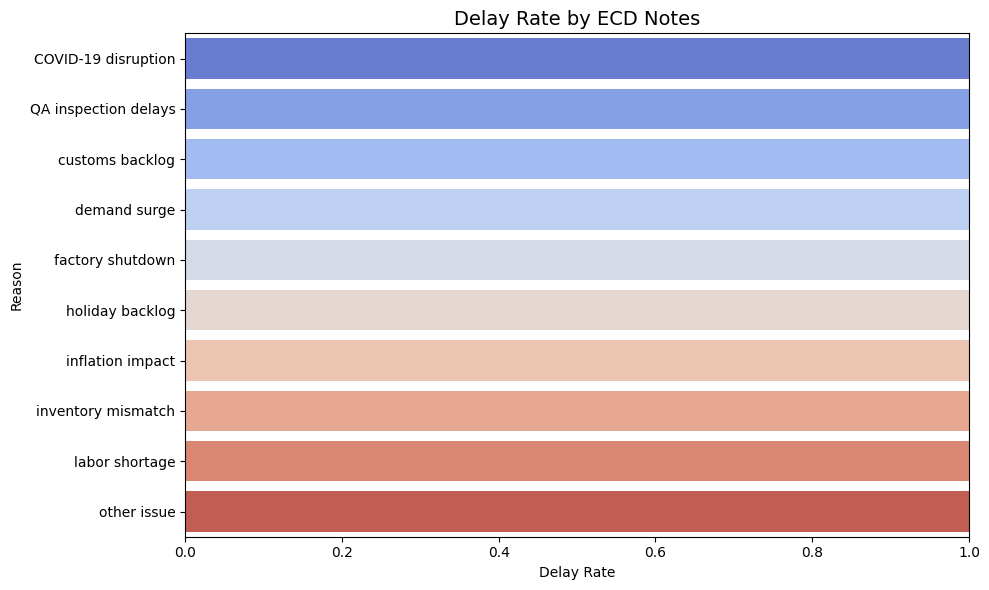

In [ ]:
# Group by ECD Notes and get delay rate
delay_by_reason = data.groupby('ECD Notes')['delay_flag'].mean().reset_index().sort_values('delay_flag', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=delay_by_reason.head(10), x='delay_flag', y='ECD Notes', palette='coolwarm')
plt.title('Delay Rate by ECD Notes', fontsize=14)
plt.xlabel('Delay Rate')
plt.ylabel('Reason')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
delay_by_reason

,ECD Notes,delay_flag
0,COVID-19 disruption,1.0
1,QA inspection delays,1.0
2,customs backlog,1.0
3,demand surge,1.0
4,factory shutdown,1.0
5,holiday backlog,1.0
6,inflation impact,1.0
7,inventory mismatch,1.0
8,labor shortage,1.0
10,other issue,1.0


In [ ]:
# Delay rate by Region Zone, and Sales Rep
grouped = data.groupby(['Zone','Region Zone'])['delay_flag'].mean().reset_index()

# Sort values
grouped = grouped.sort_values('delay_flag', ascending=False)

# View top patterns
grouped.head(10)


,Zone,Region Zone,delay_flag
14,West,Zone C,0.620502
12,West,Zone A,0.618943
0,East,Zone A,0.618102
2,East,Zone C,0.616484
3,East,Zone D,0.613978
10,South,Zone C,0.611111
5,North,Zone B,0.610883
9,South,Zone B,0.609159
7,North,Zone D,0.608122
13,West,Zone B,0.606846


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Top Level Branch         15000 non-null  object        
 1   Top Level Sold To        15000 non-null  object        
 2   Zone                     15000 non-null  object        
 3   Region Zone              15000 non-null  object        
 4   Top Level Order          15000 non-null  object        
 5   Top Level Line           15000 non-null  object        
 6   Last Next Status         15000 non-null  object        
 7   Shipment Number(s)       15000 non-null  object        
 8   TL SO Alert              3760 non-null   object        
 9   ECD                      15000 non-null  datetime64[ns]
 10  ECD Notes                15000 non-null  object        
 11  Line Creation            15000 non-null  datetime64[ns]
 12  Top Level Type           15000 n

In [ ]:
# Delay rate by Region Zone, and Sales Rep
grouped = data.groupby(['Zone','Region Zone','Top Level Branch','Top Level Type','SC Rep'])['delay_flag'].mean().reset_index()

# Sort values
grouped = grouped.sort_values('delay_flag', ascending=False)

# View top patterns
grouped.head(10)


,Zone,Region Zone,Top Level Branch,Top Level Type,SC Rep,delay_flag
587,West,Zone A,Branch 1,Type 3,Rep D,0.933333
207,North,Zone A,Branch 2,Type 1,Rep D,0.904762
22,East,Zone A,Branch 2,Type 3,Rep C,0.888889
347,North,Zone D,Branch 1,Type 3,Rep D,0.875000
739,West,Zone D,Branch 2,Type 2,Rep D,0.869565
74,East,Zone B,Branch 3,Type 1,Rep C,0.857143
186,East,Zone D,Branch 4,Type 2,Rep C,0.857143
614,West,Zone A,Branch 4,Type 1,Rep C,0.857143
667,West,Zone B,Branch 4,Type 2,Rep D,0.846154
290,North,Zone C,Branch 1,Type 1,Rep C,0.846154


In [ ]:
# Delay rate by Region Zone, and Sales Rep
grouped = data.groupby(['Zone','Region Zone','Top Level Branch','Top Level Type','SC Rep','is_urgent'])['delay_flag'].mean().reset_index()

# Sort values
grouped = grouped.sort_values('delay_flag', ascending=False)

# View top patterns
grouped.head(10)


,Zone,Region Zone,Top Level Branch,Top Level Type,SC Rep,is_urgent,delay_flag
13,East,Zone A,Branch 1,Type 2,Rep C,1,1.0
1509,West,Zone D,Branch 4,Type 1,Rep B,1,1.0
1497,West,Zone D,Branch 3,Type 2,Rep D,1,1.0
1495,West,Zone D,Branch 3,Type 2,Rep C,1,1.0
1513,West,Zone D,Branch 4,Type 1,Rep D,1,1.0
1491,West,Zone D,Branch 3,Type 2,Rep A,1,1.0
31,East,Zone A,Branch 2,Type 1,Rep D,1,1.0
361,East,Zone D,Branch 4,Type 1,Rep A,1,1.0
449,North,Zone A,Branch 3,Type 3,Rep A,1,1.0
461,North,Zone A,Branch 4,Type 1,Rep C,1,1.0


In [ ]:
# Delay rate by Region Zone, and Sales Rep
grouped = data.groupby(['Zone','Region Zone','Top Level Branch','SC Rep','is_urgent'])['delay_flag'].mean().reset_index()

# Sort values
grouped = grouped.sort_values('delay_flag', ascending=False)

# View top patterns
grouped.head(10)


,Zone,Region Zone,Top Level Branch,SC Rep,is_urgent,delay_flag
343,South,Zone C,Branch 3,Rep D,1,0.937500
15,East,Zone A,Branch 2,Rep D,1,0.916667
413,West,Zone A,Branch 4,Rep C,1,0.909091
35,East,Zone B,Branch 1,Rep B,1,0.909091
379,South,Zone D,Branch 4,Rep B,1,0.875000
492,West,Zone D,Branch 2,Rep C,0,0.860465
161,North,Zone B,Branch 1,Rep A,1,0.833333
327,South,Zone C,Branch 1,Rep D,1,0.833333
5,East,Zone A,Branch 1,Rep C,1,0.833333
473,West,Zone C,Branch 4,Rep A,1,0.823529


### Expected Insights:

In [ ]:
# Group by Region Zone and Rep
delay_by_region_rep = data.groupby(['Region Zone', 'SC Rep'])['delay_flag'].mean().reset_index()

# Sort by delay rate
delay_by_region_rep = delay_by_region_rep.sort_values(by='delay_flag', ascending=False)

# Show top high-delay combinations
delay_by_region_rep.head(10)


,Region Zone,SC Rep,delay_flag
2,Zone A,Rep C,0.630262
11,Zone C,Rep D,0.627706
6,Zone B,Rep C,0.619487
10,Zone C,Rep C,0.618839
3,Zone A,Rep D,0.614483
14,Zone D,Rep C,0.612420
12,Zone D,Rep A,0.610811
4,Zone B,Rep A,0.605319
9,Zone C,Rep B,0.602436
0,Zone A,Rep A,0.601064


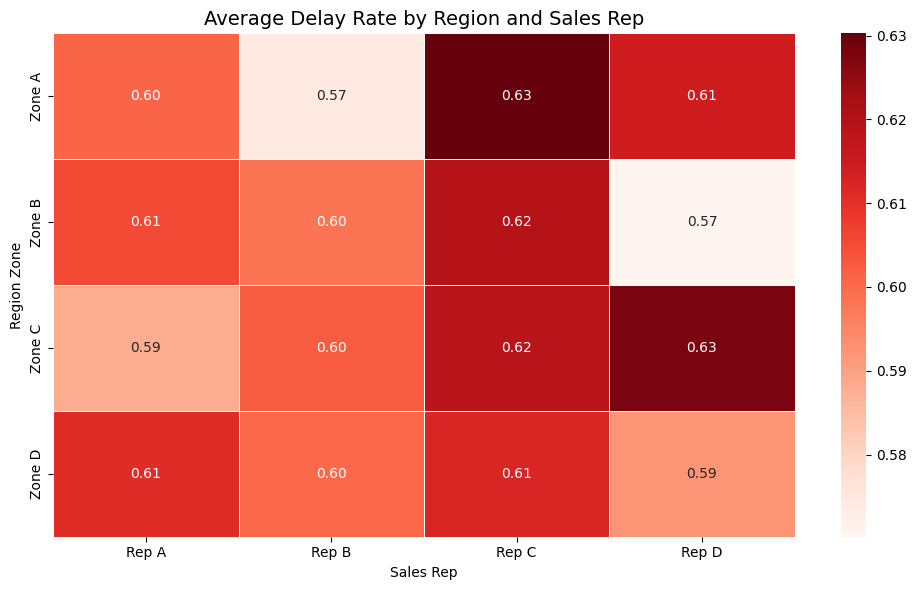

In [ ]:
# Create pivot table
heatmap_data = data.pivot_table(index='Region Zone', columns='SC Rep', values='delay_flag', aggfunc='mean')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)

plt.title('Average Delay Rate by Region and Sales Rep', fontsize=14)
plt.xlabel('Sales Rep')
plt.ylabel('Region Zone')
plt.tight_layout()
plt.show()


Delay Rate by Region and Sales Rep:


Rep C consistently shows high delay rates across all regions, with the highest at 63% in Zone A and Zone C

Rep D also shows a high delay rate (63%) in Zone A, but drops to 57% in Zone B

Rep B has the lowest delay rate overall (57%) in Zone A

Zone D shows relatively consistent performance across reps (59–61%)

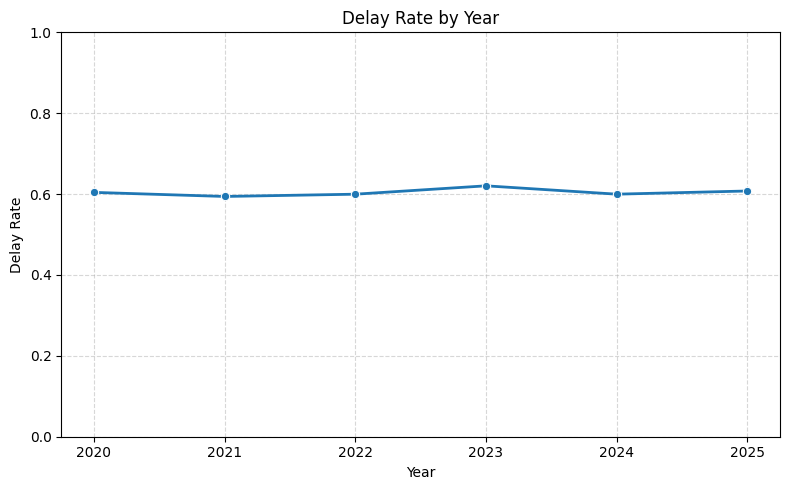

In [ ]:
delay_by_year = data.groupby('year')['delay_flag'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=delay_by_year, x='year', y='delay_flag', marker='o', linewidth=2)
plt.title('Delay Rate by Year')
plt.xlabel('Year')
plt.ylabel('Delay Rate')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-87-85beeb0534a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_month, x='month', y='delay_flag', palette='viridis')


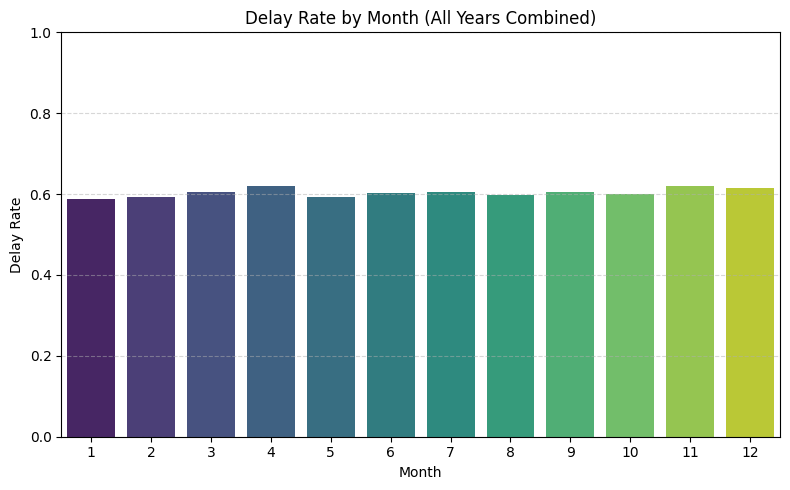

In [ ]:
delay_by_month = data.groupby('month')['delay_flag'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_month, x='month', y='delay_flag', palette='viridis')
plt.title('Delay Rate by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


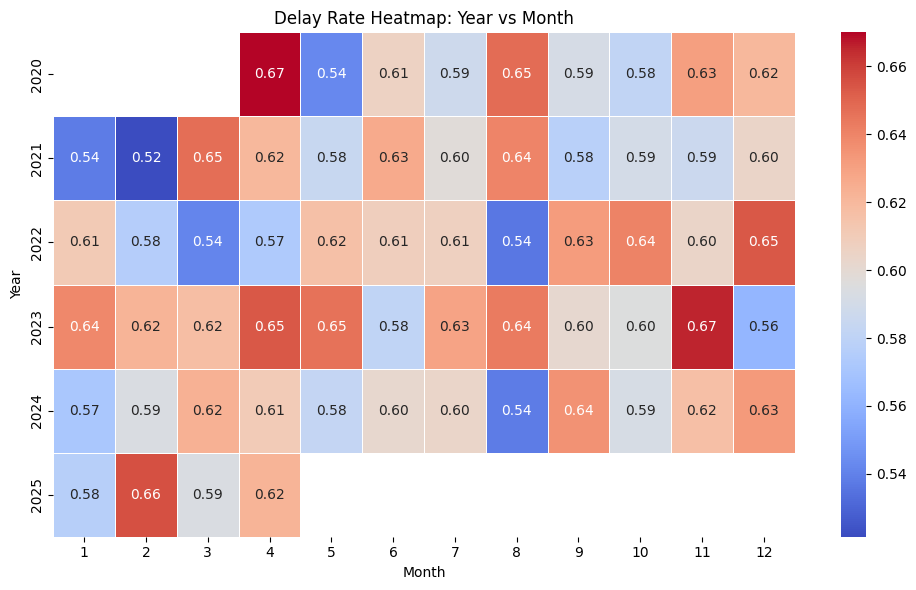

In [ ]:
heatmap_data = data.pivot_table(index='year', columns='month', values='delay_flag', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Delay Rate Heatmap: Year vs Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


In [ ]:
data

,Top Level Branch,Top Level Sold To,Zone,Region Zone,Top Level Order,Top Level Line,Last Next Status,Shipment Number(s),TL SO Alert,ECD,...,Line Amount,delay_days,delay_flag,lead_time,pickup_lead,month,year,week,is_urgent,total_units
0,Branch 1,Customer_5725,West,Zone B,ORD979385,LINE942260,Delivered,SHP607593,NaN,2021-07-07,...,6284.57,-2,0,13,2,7,2021,27,0,20.008182
1,Branch 2,Customer_1478,East,Zone D,ORD511328,LINE751062,On Hold,SHP217964,NaN,2025-01-25,...,5804.15,17,1,18,2,1,2025,2,0,211.830292
2,Branch 4,Customer_6969,South,Zone A,ORD601081,LINE281110,On Hold,SHP716060,NaN,2022-05-05,...,7932.74,14,1,29,2,4,2022,16,0,21.371680
3,Branch 2,Customer_2571,North,Zone C,ORD235895,LINE853706,Delivered,SHP871471,NaN,2022-01-26,...,6346.75,19,1,9,2,1,2022,1,0,13.026189
4,Branch 4,Customer_9149,North,Zone D,ORD162338,LINE458078,Shipped,SHP642460,NaN,2024-11-20,...,6749.76,-1,0,28,2,11,2024,47,0,14.608289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Branch 4,Customer_7766,East,Zone B,ORD555145,LINE305370,Shipped,SHP918734,URGENT,2020-12-28,...,5663.86,-1,0,24,2,12,2020,53,1,62.854955
14996,Branch 1,Customer_1398,South,Zone B,ORD157503,LINE325449,On Hold,SHP986221,NaN,2022-10-30,...,5203.28,-2,0,21,2,11,2022,44,0,58.098258
14997,Branch 4,Customer_1123,South,Zone A,ORD162903,LINE513890,Delivered,SHP653410,NaN,2023-02-08,...,4610.91,0,0,24,2,2,2023,6,0,108.262738
14998,Branch 3,Customer_3372,North,Zone C,ORD516019,LINE467771,Delivered,SHP629046,NaN,2025-01-04,...,619.51,-1,0,15,2,1,2025,1,0,2.342459


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Top Level Branch         15000 non-null  object        
 1   Top Level Sold To        15000 non-null  object        
 2   Zone                     15000 non-null  object        
 3   Region Zone              15000 non-null  object        
 4   Top Level Order          15000 non-null  object        
 5   Top Level Line           15000 non-null  object        
 6   Last Next Status         15000 non-null  object        
 7   Shipment Number(s)       15000 non-null  object        
 8   TL SO Alert              3760 non-null   object        
 9   ECD                      15000 non-null  datetime64[ns]
 10  ECD Notes                15000 non-null  object        
 11  Line Creation            15000 non-null  datetime64[ns]
 12  Top Level Type           15000 n

In [ ]:
# Step 1: Define the list of features to keep

features_to_keep = [
    'Top Level Branch',
    'Zone',
    'Region Zone',
    'Top Level Type',
    'SC Rep',
    'Last Next Status',
    'ECD Notes',
    'Line Amount',
    'lead_time',
    'pickup_lead',
    'total_units',
    'month',
    'year',
    'is_urgent',
    'delay_days',
    'delay_flag'
]


# Step 2: Create a new DataFrame with only those columns
model_data = data[features_to_keep].copy()

# Step 3: Confirm the shape and preview the data
print(model_data.shape)
model_data.head()


(15000, 16)


,Top Level Branch,Zone,Region Zone,Top Level Type,SC Rep,Last Next Status,ECD Notes,Line Amount,lead_time,pickup_lead,total_units,month,year,is_urgent,delay_days,delay_flag
0,Branch 1,West,Zone B,Type 3,Rep A,Delivered,on track,6284.57,13,2,20.008182,7,2021,0,-2,0
1,Branch 2,East,Zone D,Type 1,Rep C,On Hold,demand surge,5804.15,18,2,211.830292,1,2025,0,17,1
2,Branch 4,South,Zone A,Type 2,Rep D,On Hold,supplier price changes,7932.74,29,2,21.371680,4,2022,0,14,1
3,Branch 2,North,Zone C,Type 3,Rep C,Delivered,customs backlog,6346.75,9,2,13.026189,1,2022,0,19,1
4,Branch 4,North,Zone D,Type 2,Rep C,Shipped,on track,6749.76,28,2,14.608289,11,2024,0,-1,0


In [ ]:
categorical_cols = [
    'Top Level Branch',
    'Zone',
    'Region Zone',
    'Top Level Type',
    'SC Rep',
    'Last Next Status',
    'ECD Notes'
]


In [ ]:
# Step 1: One-hot encode categorical columns
model_encoded = pd.get_dummies(model_data, columns=categorical_cols)

# Step 2: Check shape and preview
print(model_encoded.shape)
model_encoded.head()


(15000, 49)


,Line Amount,lead_time,pickup_lead,total_units,month,year,is_urgent,delay_days,delay_flag,Top Level Branch_Branch 1,...,ECD Notes_inventory mismatch,ECD Notes_labor shortage,ECD Notes_on track,ECD Notes_other issue,ECD Notes_production capacity limits,ECD Notes_raw material shortage,ECD Notes_severe weather,ECD Notes_shipping container shortage,ECD Notes_supplier price changes,ECD Notes_supply chain delay
0,6284.57,13,2,20.008182,7,2021,0,-2,0,True,...,False,False,True,False,False,False,False,False,False,False
1,5804.15,18,2,211.830292,1,2025,0,17,1,False,...,False,False,False,False,False,False,False,False,False,False
2,7932.74,29,2,21.371680,4,2022,0,14,1,False,...,False,False,False,False,False,False,False,False,True,False
3,6346.75,9,2,13.026189,1,2022,0,19,1,False,...,False,False,False,False,False,False,False,False,False,False
4,6749.76,28,2,14.608289,11,2024,0,-1,0,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
model_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Line Amount                            15000 non-null  float64
 1   lead_time                              15000 non-null  int64  
 2   pickup_lead                            15000 non-null  int64  
 3   total_units                            15000 non-null  float64
 4   month                                  15000 non-null  int32  
 5   year                                   15000 non-null  int32  
 6   is_urgent                              15000 non-null  int64  
 7   delay_days                             15000 non-null  int64  
 8   delay_flag                             15000 non-null  int64  
 9   Top Level Branch_Branch 1              15000 non-null  bool   
 10  Top Level Branch_Branch 2              15000 non-null  bool   
 11  To